<a href="https://colab.research.google.com/github/AunHaider22/prodigy_info_intern_DS/blob/main/prodigy_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

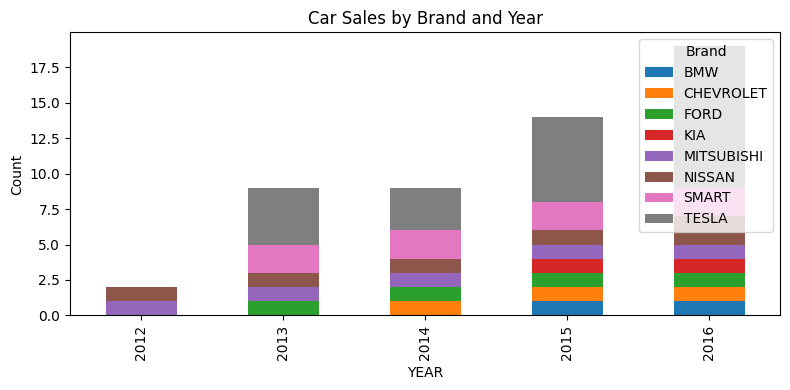

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (assuming it's in a file named 'cars.csv')
data = pd.read_csv('/cars.csv')

# Pivot the data to count the occurrences of each brand by year
brand_by_year = data.pivot_table(index='YEAR', columns='Brand', aggfunc='size', fill_value=0)

# Create a bar plot for each brand's sales by year
brand_by_year.plot(kind='bar', stacked=True, figsize=(8, 4))

# Label the axes and set the title
plt.xlabel('YEAR')
plt.ylabel('Count')
plt.title('Car Sales by Brand and Year')

# Show the plot
plt.legend(title='Brand', loc='upper right')
plt.tight_layout()
plt.show()






TASK 2


Missing Values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


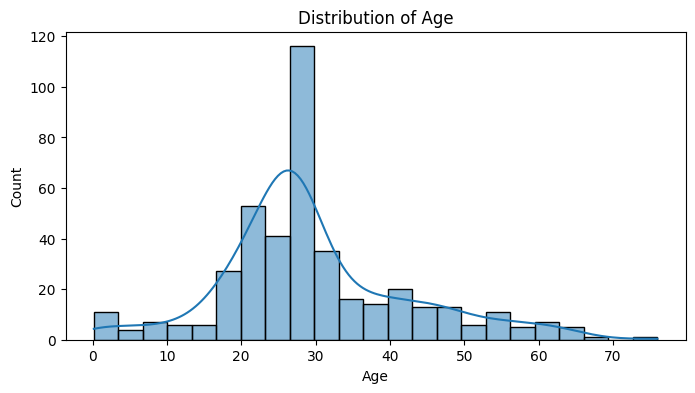

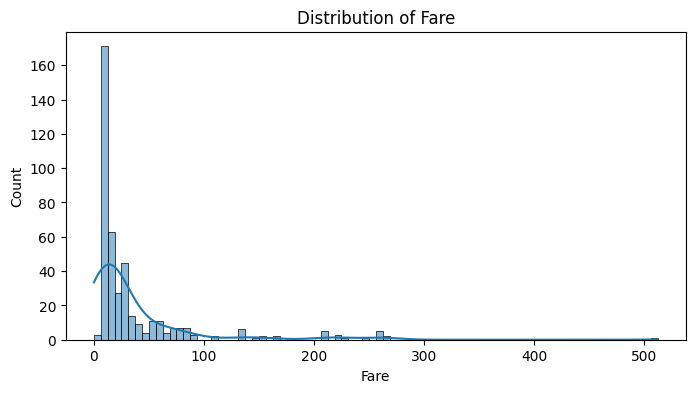

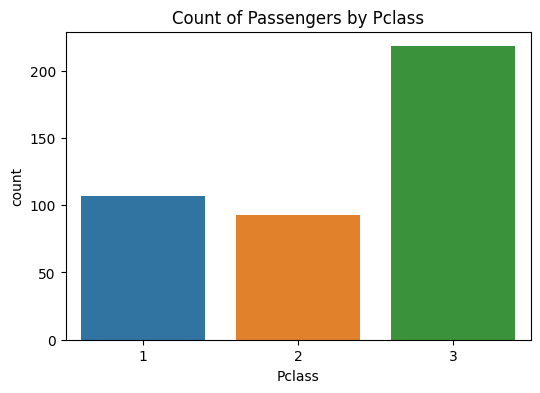

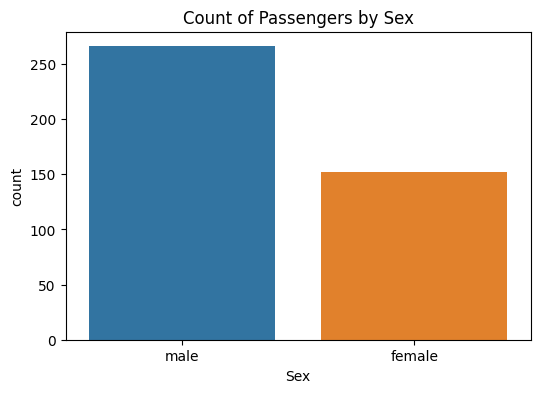

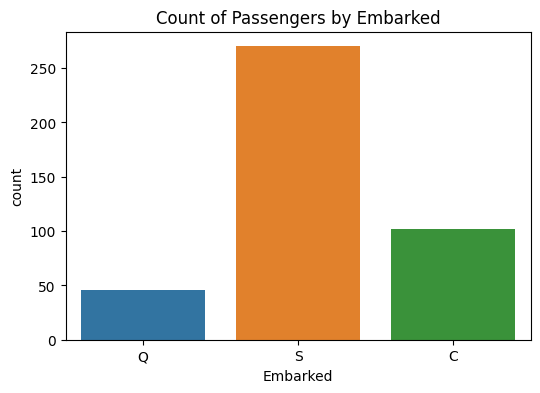

ValueError: ignored

<Figure size 600x400 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic_df = pd.read_csv("/test.csv")


# Data Cleaning
# 1. Handling Missing Data
# Check for missing values
missing_values = titanic_df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Impute missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# 2. Remove Duplicates
titanic_df.drop_duplicates(inplace=True)

# Data Exploration (EDA)
# Univariate Analysis
# Numeric Variables
numeric_features = ['Age', 'Fare']
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(titanic_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Categorical Variables
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Survived']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))

    plt.title(f'Count of Passengers by {feature}')
    plt.show()

# Bivariate Analysis
# Relationship between Age and Fare
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Survived')
plt.title('Age vs. Fare by Survival')
plt.show()

# Correlation Matrix for Numeric Variables
correlation_matrix = titanic_df[numeric_features].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Multivariate Analysis
# Relationship between Age, Fare, and Pclass
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Pclass', size='Pclass')
plt.title('Age vs. Fare by Pclass')
plt.show()

# Visualizations
# Box Plot of Age by Pclass
plt.figure(figsize=(6, 4))
sns.boxplot(data=titanic_df, x='Pclass', y='Age')
plt.title('Age Distribution by Pclass')
plt.show()

# Pairplot for numeric variables
sns.pairplot(titanic_df[numeric_features], hue='Survived')
plt.show()

# Conclusion and Findings
# For a detailed conclusion and findings, you can write a summary based on your observations.



Task 3

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_text
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset directly from the UCI Machine Learning Repository
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


# Split the dataset into features (X) and the target (y)
X = data.drop(columns=['y'])  # Features
y = data['y']  # Target variable ('yes' or 'no')

# Separate the categorical and numeric features
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(exclude=['object']).columns

# One-hot encode the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree classifier within a pipeline
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Decision Tree Classifier Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

# Visualize the decision tree (text-based)
tree_rules = export_text(clf.named_steps['classifier'], feature_names=list(X.columns))
print("\nDecision Tree Rules:\n", tree_rules)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

TypeError: ignored

TASK 4

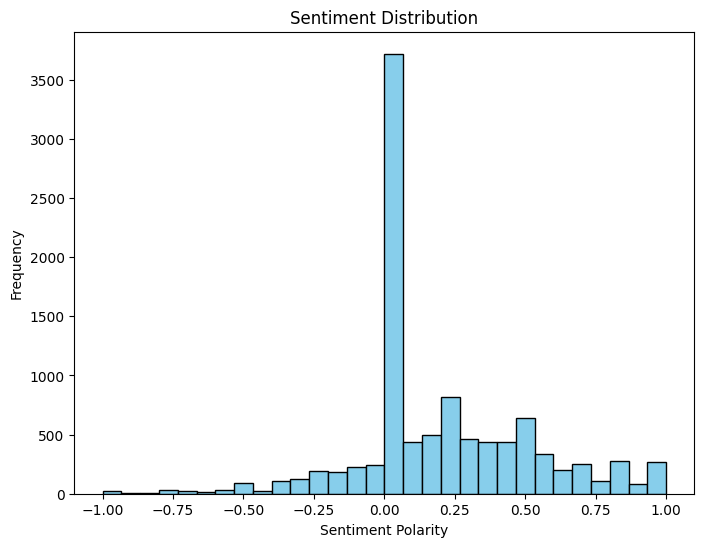

In [16]:

import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Step 1: Load your social media data
data = pd.read_csv("/content/analysis.csv")


# Step 2: Perform Sentiment Analysis and create a new column for sentiment
data['sentiment'] = data['message to examine'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Step 3: Visualize Sentiment Patterns with a histogram
plt.figure(figsize=(8, 6))
plt.hist(data['sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()


Task 5

<ipython-input-6-d914d7f8aad3>:6: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/accident.csv')


   Crash ID State  Month  Year   Dayweek   Time Crash Type Bus Involvement  \
0  20212133   Vic      9  2021    Sunday   0:30     Single             NaN   
1  20214022    SA      9  2021  Saturday  23:31   Multiple              No   
2  20212096   Vic      9  2021  Saturday  23:00     Single             NaN   
3  20212145   Vic      9  2021  Saturday  22:25     Single             NaN   
4  20212075   Vic      9  2021  Saturday   5:15     Single             NaN   

  Heavy Rigid Truck Involvement Articulated Truck Involvement  ... Age  \
0                           NaN                           NaN  ...  38   
1                            No                            No  ...  28   
2                           NaN                           NaN  ...  19   
3                           NaN                           NaN  ...  23   
4                           NaN                           NaN  ...  46   

   National Remoteness Areas           SA4 Name 2016  National LGA Name 2017  \
0   In

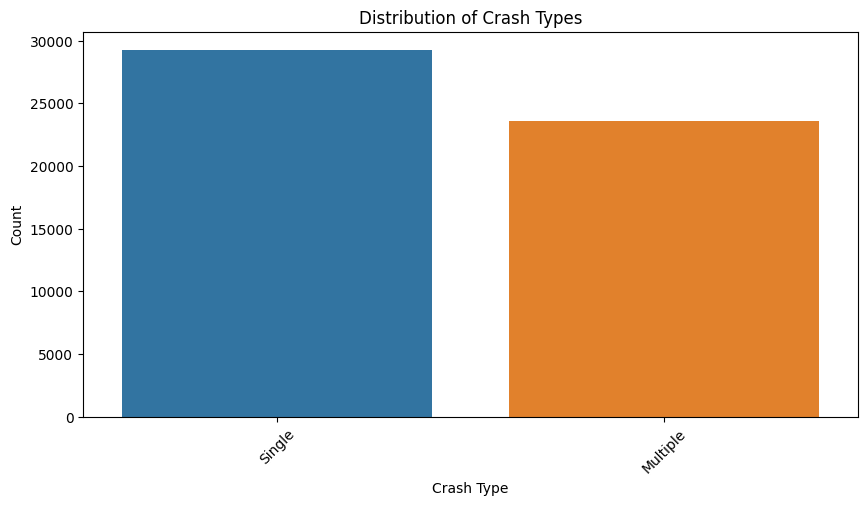

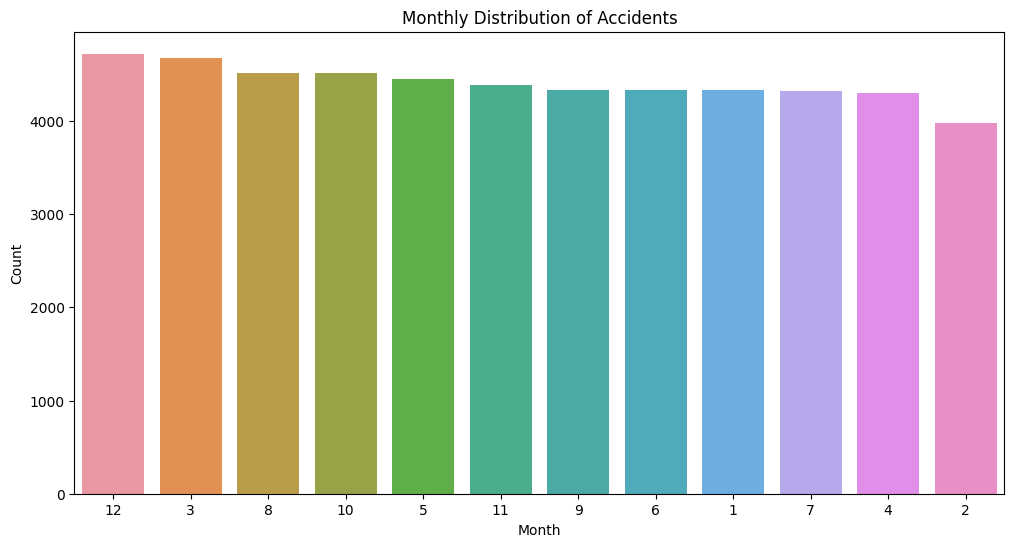

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/accident.csv')

# Display the first few rows of the dataset
print(data.head())

# Data Preprocessing (if needed)
# For example, you can convert categorical variables to the appropriate data types
data['Month'] = data['Month'].astype(str)  # Convert 'Month' to string

# Basic EDA
print(data.info())  # Get data types and non-null counts
print(data.describe())  # Display summary statistics

# Data Visualization

# Example 1: Create a bar chart to visualize crash types
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Crash Type', order=data['Crash Type'].value_counts().index)
plt.title('Distribution of Crash Types')
plt.xlabel('Crash Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Example 2: Visualize the time distribution of accidents
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Month', order=data['Month'].value_counts().index)
plt.title('Monthly Distribution of Accidents')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Example 3: Geographic map (assuming you have location data)
# Note: You may need to install Geopandas and import it to create geographic maps.

# Feature Engineering
# You can create new features based on the existing attributes if needed.

# Additional Visualization and Analysis
# You can add more visualizations and statistical analysis based on your dataset attributes.

# Machine Learning (Optional)
# If you want to build predictive models, you can apply machine learning algorithms.

# Save Figures (Optional)
# You can save your figures to files for use in reports or presentations.
# plt.savefig('crash_type_distribution.png')

# Finally, show the plots
plt.show()
